In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d 

In [15]:
nus = ['nue','numu','nuebar','numubar']
interp_fluxes=[]
for nu in nus:
    e, f = np.genfromtxt(f"SBND_{nu}.dat", unpack=True)
    finter = interp1d(e,f/1e6/0.05/1e4, bounds_error=False, fill_value=0.0)
    interp_fluxes.append(finter)


3.06e+04
4.46e+06
2.97e+03
1.79e+05


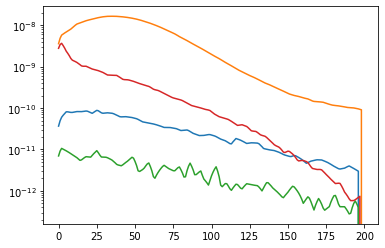

In [21]:
enu = np.linspace(0.05,3.0,200)
fluxes=[]
for f in interp_fluxes:
    fluxes.append(f(enu))
    plt.plot(f(enu))
for f in interp_fluxes:
    print(f"{np.sum(f(enu)*110e6*6e23*1e-38*6e20*enu)*(enu[1]-enu[0]):.3g}")

plt.yscale("log")

In [22]:
zeros=np.zeros(np.size(fluxes[0]))
data=np.stack((enu,fluxes[0],fluxes[1],zeros,fluxes[2],fluxes[3],zeros),axis=0)

In [23]:
np.savetxt('../sbnd_fhc.dat', data.T, header='Enu (GeV) nue numu nutau nuebar numubar nutaubar (all in nus/cm^2/GeV/POT)')